In [1]:
#Importing Dependancies

# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


#### Generating Random Data for Practice

In [2]:
data = np.random.exponential(size=1000)

In [3]:
#Scaling by mlxtend
scaled_data = minmax_scaling(data, columns=[0])

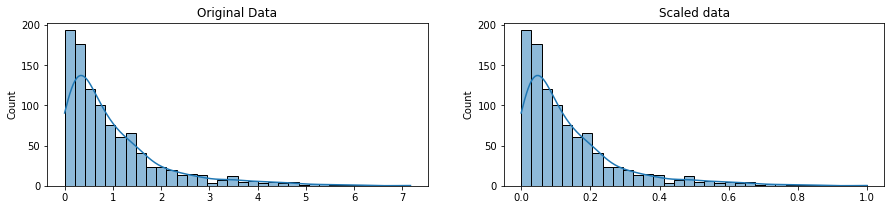

In [4]:
# plotting Scaled Data
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

### Sklearn(MinmaxScaler)

In [5]:
#Scaling By MinMaxScaler Sklearn
data=pd.DataFrame(data)
mnscaler=MinMaxScaler()
scaled_data=mnscaler.fit_transform(data)

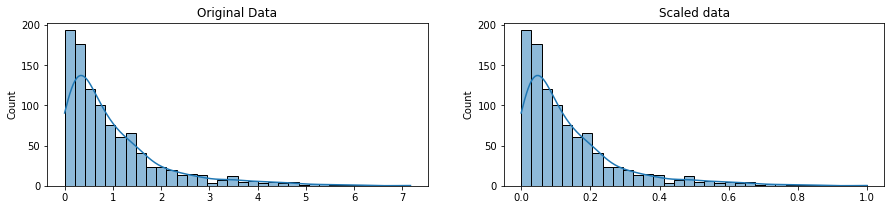

In [6]:
# plotting Scaled Data
fig, ax = plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")

plt.show()

## Normalization

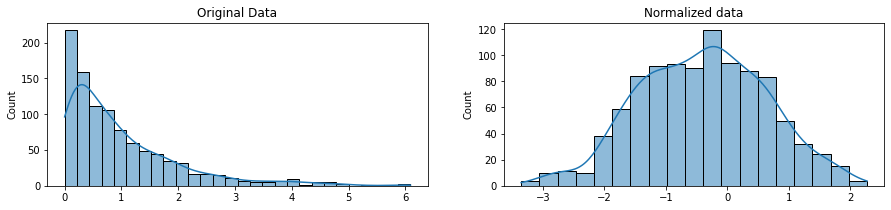

In [7]:
data = np.random.exponential(size=1000)
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")

plt.show()

## Practice Dataset

In [8]:
df=pd.read_csv("Kickstarter 1 projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Scaling

In [9]:
# select the usd_goal_real column
original_data = pd.DataFrame(df.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

print(f"Original Goal Data \n {original_data.head()}\n\n")
print(f"Min of Original Data is{original_data.min()}\nMax of Original Data is {original_data.max()}\n\n") 


print(f"Scaled Goal \n {scaled_data.head()}\n\n")
print(f"Min of Scaled Goal is{scaled_data.min()}\nMax of Original Data is {scaled_data.max()}\n\n")

Original Goal Data 
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00


Min of Original Data isusd_goal_real    0.01
dtype: float64
Max of Original Data is usd_goal_real    1.663614e+08
dtype: float64


Scaled Goal 
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117


Min of Scaled Goal isusd_goal_real    0.0
dtype: float64
Max of Original Data is usd_goal_real    1.0
dtype: float64




In [10]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(df['goal'])
scaled_goal=minmax_scaling(original_goal_data,columns=['goal'])


print(f"Original Goal Data \n {original_goal_data.head()}\n\n")
print(f"Min of Original Data is{original_goal_data.min()}\nMax of Original Data is {original_goal_data.max()}\n\n") 

print(f"Scaled Goal \n {scaled_goal.head()}\n\n")
print(f"Min of Scaled Goal is{scaled_goal.min()}\nMax of Original Data is {scaled_goal.max()}\n\n")

Original Goal Data 
       goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0


Min of Original Data isgoal    0.01
dtype: float64
Max of Original Data is goal    100000000.0
dtype: float64


Scaled Goal 
        goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195


Min of Scaled Goal isgoal    0.0
dtype: float64
Max of Original Data is goal    1.0
dtype: float64




### Normalization

In [11]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_pledged=df['usd_pledged_real']>0

# get only positive pledges (using their indexes)
positive_pledged=df['usd_pledged_real'].loc[index_of_pledged]

# normalize the pledges (w/ Box-Cox)
normlized_pledged=pd.Series(stats.boxcox(positive_pledged)[0],name='pledged',index=positive_pledged.index)


print(f"Positive pledged Preview \n {positive_pledged.head()}\n\n")
print(f"Min of Positive Pledged is{positive_pledged.min()}\nMax of Original Data is {positive_pledged.max()}\n\n")

print(f"Normalized pledged Preview \n {normlized_pledged.head()}\n\n")
print(f"Min of Normalized Pledged is{normlized_pledged.min()}\nMax of Original Data is {normlized_pledged.max()}\n\n")

Positive pledged Preview 
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64


Min of Positive Pledged is0.45
Max of Original Data is 20338986.27


Normalized pledged Preview 
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: pledged, dtype: float64


Min of Normalized Pledged is-0.7779954122762203
Max of Original Data is 30.69054020451361




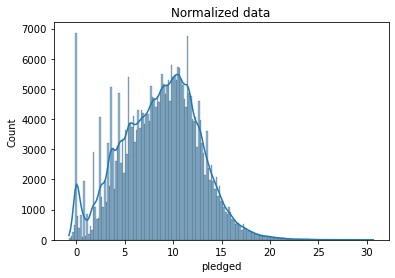

In [13]:
#Plotting normalized Pledged
ax = sns.histplot(normlized_pledged, kde=True)
ax.set_title("Normalized data")
plt.show()

In [15]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_pledged=df['pledged']>0

# get only positive pledges (using their indexes)
positive_pledged=df['pledged'].loc[index_of_pledged]

# normalize the pledges (w/ Box-Cox)
normlized_pledged=pd.Series(stats.boxcox(positive_pledged)[0],name='pledged',index=positive_pledged.index)

print(f"Positive pledged Preview \n {positive_pledged.head()}\n\n")
print(f"Min of Positive Pledged is{positive_pledged.min()}\nMax of Original Data is {positive_pledged.max()}\n\n")


print(f"Normalized pledged Preview \n {normlized_pledged.head()}\n\n")
print(f"Min of Normalized Pledged is{normlized_pledged.min()}\nMax of Original Data is {normlized_pledged.max()}\n\n")

Positive pledged Preview 
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64


Min of Positive Pledged is1.0
Max of Original Data is 20338986.27


Normalized pledged Preview 
 1    10.013887
2     6.403367
3     0.000000
4     9.005193
5    15.499596
Name: pledged, dtype: float64


Min of Normalized Pledged is0.0
Max of Original Data is 29.63030787418848




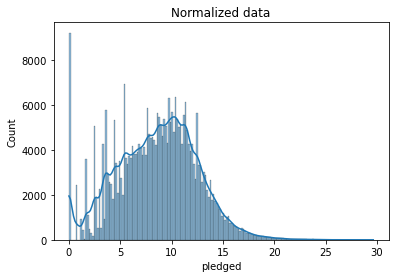

In [17]:
#Plotting normalized Pledged
ax = sns.histplot(normlized_pledged, kde=True)
ax.set_title("Normalized data")
plt.show()